In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automoblie","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
classes[]

'deer'

In [51]:
def plot_sample(X, y, index):
    plt.figure(figsize=(20,2))
    plt.imshow(X[index]) #3D Array 32x32
    plt.xlabel(classes[y[index]])

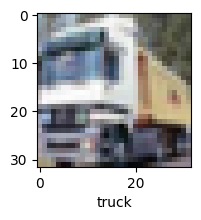

In [52]:
plot_sample(X_train, y_train, 1)

In [11]:
X_train = X_train / 255
X_test = X_test/ 255

In [22]:
def create_model():
    model = Sequential()
    return model

model = create_model()  # Correct way to define model

In [34]:
# = sequential()
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 83ms/step - accuracy: 0.2994 - loss: 1.9352
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.4175 - loss: 1.6411
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 85ms/step - accuracy: 0.4561 - loss: 1.5515
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 86ms/step - accuracy: 0.4757 - loss: 1.4887
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 92ms/step - accuracy: 0.4967 - loss: 1.4359


In [35]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4623 - loss: 1.5169


[1.518308162689209, 0.4611000120639801]

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.45      0.53      1000
           1       0.71      0.43      0.54      1000
           2       0.35      0.43      0.39      1000
           3       0.33      0.29      0.31      1000
           4       0.52      0.17      0.26      1000
           5       0.32      0.55      0.40      1000
           6       0.56      0.49      0.53      1000
           7       0.41      0.69      0.51      1000
           8       0.72      0.45      0.56      1000
           9       0.49      0.65      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



***Use CNN to improve performing***  

In [37]:
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7321 - loss: 0.7756
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.7522 - loss: 0.7139
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 56ms/step - accuracy: 0.7668 - loss: 0.6770
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 62ms/step - accuracy: 0.7798 - loss: 0.6312
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 45ms/step - accuracy: 0.7960 - loss: 0.5885
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.7999 - loss: 0.5694
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.8141 - loss: 0.5321
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 63ms/step - accuracy: 0.8232 - loss: 0.5041
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 53ms/step - accuracy: 0.8359 - loss: 0.4737
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 52ms/step - accuracy: 0.8404 - loss: 0.4531


In [41]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6812 - loss: 1.0860


[1.085053563117981, 0.6780999898910522]

In [42]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

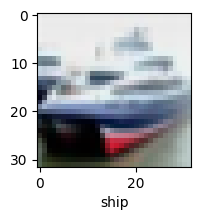

In [44]:
plot_sample(X_test, y_test, 1)

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]  #probabilities

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[6.32842348e-05, 8.21610320e-06, 4.11796989e-03, 8.75984192e-01,
        2.98085215e-05, 6.38464019e-02, 4.34580185e-02, 1.15003820e-06,
        1.24218995e-02, 6.90067973e-05],
       [5.01700997e-05, 3.87141593e-02, 1.97674921e-09, 3.08033179e-07,
        5.31817666e-14, 1.82118232e-08, 4.23241546e-11, 2.90150960e-13,
        9.61033046e-01, 2.02185314e-04],
       [2.53382623e-01, 2.62991369e-01, 8.82048043e-04, 1.33157219e-03,
        1.81038540e-05, 1.55798552e-04, 4.47327911e-05, 1.77052843e-05,
        4.80049253e-01, 1.12659170e-03],
       [9.87151325e-01, 6.23770802e-06, 1.57470586e-05, 6.43781095e-05,
        2.76649498e-05, 1.32903544e-09, 1.82845863e-08, 2.31241915e-09,
        1.27346125e-02, 4.46752004e-08],
       [3.47281741e-08, 5.36923108e-06, 3.76660842e-04, 6.38495907e-02,
        5.28828334e-03, 7.64844823e-04, 9.29710686e-01, 2.56891806e-08,
        3.97145277e-06, 3.06844868e-07]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [48]:
classes[y_classes[1]]

'ship'

In [50]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.79      0.80      0.80      1000
           2       0.51      0.63      0.57      1000
           3       0.54      0.45      0.49      1000
           4       0.70      0.52      0.60      1000
           5       0.55      0.60      0.58      1000
           6       0.68      0.84      0.75      1000
           7       0.75      0.72      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.85      0.65      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

